In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

xls = pd.ExcelFile('EPIC.xlsx')
patients = pd.read_excel(xls, 'Patients')
admissions = pd.read_excel(xls, 'Admissions')
icu_stays = pd.read_excel(xls, 'ICU_Stays')
bypass_surgeries = pd.read_excel(xls, 'Bypass_Surgeries')
hemoblobin = pd.read_excel(xls, 'Haemoglobins')
transfusion = pd.read_excel(xls, 'Transfusions')

- patients:

'PATIENT_NUMBER', 'DOB', 'Gender'
admissions
'ADMISSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_TIME',
       'DISCHARGE_TIME'
- icu_stays:

'ICU_STAY_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER',
       'ICU_START_TIME', 'ICU_END_TIME'
- bypass_surgeries:

'SURGERY_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'START_TIME',
       'FINISH_TIME']
- hemoblobin:

'HAEMOGLOBIN_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'RESULT',
       'REFERENCE_LOW', 'REFERENCE_HIGH', 'REFERENCE_UNIT',
       'SPECIMEN_TAKEN_TIME', 'RESULT_TIME']
- transfusion:

'TRANSFUSION_NUMBER', 'PATIENT_NUMBER', 'ADMISSION_NUMBER', 'VOLUME',
       'BLOOD_START_TIME', 'BLOOD_END_TIME'
       
patient_number= subject_id
admission_number = hamd_id

#### Analysis for packed red cell
- blood transfusion totalamountuom distribution
- blood transfusion count distribution


In [2]:
def histplot_bloodtransfusion_volume(packed_red_cells,name):
    female = packed_red_cells.loc[packed_red_cells.gender == 'F' ].totalamount
    male = packed_red_cells.loc[packed_red_cells.gender == 'M' ].totalamount
    plt.hist(male,  edgecolor="black",label= f"male | {len(packed_red_cells.loc[packed_red_cells.gender == 'M'])}")
    plt.hist(female, edgecolor="black",label= f"female | {len(packed_red_cells.loc[packed_red_cells.gender == 'F'])}")
    plt.xlabel("Blood transfusion totalamount")
    plt.ylabel("Number of Patient")
    plt.title("Number of Patient in each group")
    plt.legend()
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_bloodtransfusion_volume.png')
    plt.show()


In [3]:

def histplot_bloodtransfusion_counts(blood_transfusion_count,name):
    male_Hb = blood_transfusion_count[blood_transfusion_count.gender == 'M']
    sns.distplot(male_Hb['counts'], label='male')

    female_Hb =blood_transfusion_count[blood_transfusion_count.gender == 'F']
    sns.distplot(female_Hb['counts'],label='female')

    plt.legend(prop={'size': 12})
    plt.title('Distribution of number of blood transfusion')
    plt.xlabel('Number of blood transfusion')
    plt.ylabel('Density')
    plt.savefig(f'Bloodtransfusion_plots/{name}_histplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    
    

def boxplot_bloodtransfusion_counts(blood_transfusion_count,name):
    sns.boxplot(x="gender", y='counts', data=blood_transfusion_count)
    plt.title("Number of blood transfusion")
    plt.ylabel('Number of blood transfusion')
    plt.savefig(f'Bloodtransfusion_plots/{name}_boxplot_numberOfbloodTransfusion_gender.png')
    plt.show()
    

In [4]:
transfusion_patient = transfusion.merge(patients, how = 'left', on='PATIENT_NUMBER')
transfusion_patient.loc[transfusion_patient.BLOOD_START_TIME == "Null", 'BLOOD_END_TIME'] = transfusion_patient.BLOOD_START_TIME
transfusion_patient_format = transfusion_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender", "VOLUME": "totalamount", "BLOOD_START_TIME": "starttime"}, errors="raise")

transfusion_patient

,TRANSFUSION_NUMBER,PATIENT_NUMBER,ADMISSION_NUMBER,VOLUME,BLOOD_START_TIME,BLOOD_END_TIME,DOB,Gender
0,1,93,45,305.00,2022-04-13 21:16:00,2022-04-13 21:21:00,1952-07-14,F
1,2,90,239,325.60,2021-04-13 05:53:00,2021-04-13 09:35:00,1951-05-18,M
2,3,93,45,268.00,2022-04-16 09:37:00,2022-04-16 12:00:00,1952-07-14,F
3,4,139,105,263.00,2022-04-02 09:55:00,2022-04-02 12:51:00,1950-07-13,M
4,5,99,207,255.00,2021-12-07 20:00:00,2021-12-07 20:20:00,1944-02-19,M
...,...,...,...,...,...,...,...,...
258,253,93,45,260.00,2022-04-18 16:25:00,2022-04-18 18:25:00,1952-07-14,F
259,254,93,45,260.00,2022-04-27 11:22:00,2022-04-27 11:27:00,1952-07-14,F
260,255,76,175,250.00,2021-08-31 17:50:00,2021-08-31 18:51:00,1966-08-11,M
261,256,90,239,496.00,2021-04-11 17:17:00,2021-04-11 20:00:00,1951-05-18,M


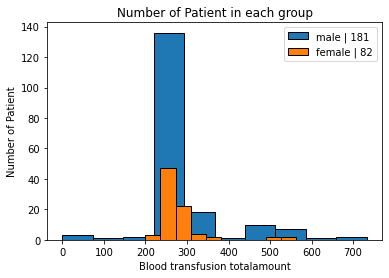

In [5]:
histplot_bloodtransfusion_volume(transfusion_patient_format,"EPIC")

In [6]:
blood_transfusion_count = transfusion_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='counts')
#blood_transfusion_count = blood_transfusion_count.merge(transfusion_patient, how = 'inner', on='ADMISSION_NUMBER')
#blood_transfusion_count = blood_transfusion_count.merge(patients, how = 'left', on='PATIENT_NUMBER')
#hadm_id	gender	counts
blood_transfusion_count_format = blood_transfusion_count.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
blood_transfusion_count

,ADMISSION_NUMBER,Gender,counts
0,2,M,5
1,8,M,2
2,12,M,1
3,16,M,3
4,18,M,1
...,...,...,...
72,249,M,1
73,252,M,1
74,257,F,2
75,259,M,1


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


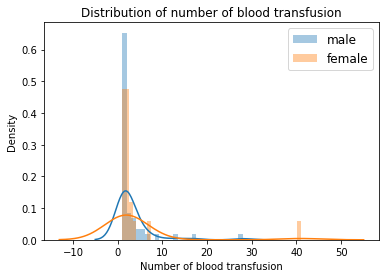

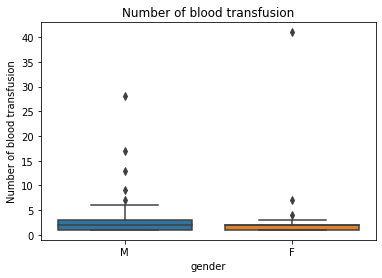

In [7]:
histplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")
boxplot_bloodtransfusion_counts(blood_transfusion_count_format,"EPIC")

#### Labevent analysis
- example as hemoglobin and can be applied to other labevent
    - step1: get csv file from sql: just change the line95 in INR(PT) query to any other labevent label name

    - step2: run function get_EDA(INR_PT,"INR_PT") where INR_PT is the dataframe read from csv file and "INR_PT" is labevent label name
- measurements that pointed out by clinician collected and shown in the dataframe

- correlation between value measurements (scatterplot)
    - value diff vs pretransfusion
    - value diff vs posttransfusion  
- value measurements under different number of blood transfusion (boxplot,distribution(with and without gender feature))
    - pretransfusion 
    - posttransfusion   
- value measurements vs time measurements (scatterplot)
    - posttransfusion vs time between posttransfusion and first blood transfusion
    - pretransfusion vs time between pretransfusion and first blood transfusion
    - value diff vs time between posttransfusion and pretransfusion
    - value diff vs time between pretransfusion and first blood transfusion
- time measurement distribution (distribution, boxplot)
    - time between irst blood transfusion and posttransfusion
    - time between pretransfusion and first blood transfusion
    
##### Note additional preprocess for hemoglobin
- Hemoglobin measurements from two table labevents and charevents
- But 4552 of the 4574 measurements in charevent are duplicates with labevent, which means we only get 22 more records
    

### This PART is inside epic_hemoglobin
-----

### Additional analysis on value under different number of blood transfusion
- number of procedures taken
- icu stay time
- number of times enter icu


#### number of procedures taken

#### Icu stay time


In [ ]:
def boxplot_icu_stay_time(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, y="icu_stay_time")
    #sns.histplot(data=icu_stay_time_blood_counts, x="icu_stay_time")
    plt.title("Icu stay time distribution")
    plt.savefig(f'Additional_CABG_plots/{name}_boxtplot_icu_stay_time.png')
    plt.show()

In [ ]:
def boxplots_icu_stay_time_bloodtransfusion(icu_stay_time_blood_counts,name):
    
    plt.figure(figsize=(7,7))
    sns.boxplot(data=icu_stay_time_blood_counts, x="counts", y="icu_stay_time")
    plt.title("Boxplot for icu stay time under different number of blood transfusion")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_icu_stay_time_bloodtransfusion.png')
    plt.show()

In [ ]:
def boxplots_enter_icu__time_bloodtransfusion(enter_icu_timesblood_counts,name):
    plt.figure(figsize=(7,7))
    sns.boxplot(data=enter_icu_timesblood_counts, x="number_of_enter_icu", y="counts")
    plt.title("Boxplot for number of blood transfusion under different times of entering icu")
    plt.savefig(f'Additional_CABG_plots/{name}_boxplot_enter_icu_times_bloodtransfusion.png')
    plt.show()

In [ ]:
#icu_stays_patient
icu_stays_noicunumber=icu_stays.drop(columns=['ICU_STAY_NUMBER'])
# there is some duplicate rows 
icu_stays_noicunumber = icu_stays_noicunumber.drop_duplicates()
icu_stays_noicunumber

In [ ]:
icu_stays_patient = icu_stays_noicunumber.merge(patients, how = 'left', on='PATIENT_NUMBER')
icu_stays_patient['ICU_START_TIME'] = pd.to_datetime(icu_stays_patient['ICU_START_TIME'])
icu_stays_patient['ICU_END_TIME'] = pd.to_datetime(icu_stays_patient['ICU_END_TIME'])
icu_stays_patient['icu_stay_time'] = (icu_stays_patient['ICU_END_TIME'] - icu_stays_patient['ICU_START_TIME']).dt.seconds/3600
icu_total_stay_format = icu_stays_patient.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_total_stay_format

In [ ]:
boxplot_icu_stay_time(icu_total_stay_format,"EPIC")

In [ ]:
icu_stays_patient_bloodtransfusion = icu_stays_patient.merge(blood_transfusion_count, how = 'inner', on=['ADMISSION_NUMBER','Gender'])
icu_stays_patient_bloodtransfusionformat = icu_stays_patient_bloodtransfusion.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_stays_patient_bloodtransfusion

In [ ]:
boxplots_icu_stay_time_bloodtransfusion(icu_stays_patient_bloodtransfusion,"EPIC")

In [ ]:
icu_stays_times = icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='number_of_enter_icu')
icu_stays_times

In [ ]:
icu_stays_times = icu_stays_times.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')
icu_stays_timesformat = icu_stays_times.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
icu_stays_times

In [ ]:
boxplots_enter_icu__time_bloodtransfusion(icu_stays_timesformat,"EPIC")

In [ ]:
icu_total_stay=icu_stays_patient.groupby(['ADMISSION_NUMBER','Gender'])['icu_stay_time'].agg(icu_stay_time='sum')
#icu_total_stay = icu_total_stay.merge(icu_stays_patient, how = 'left', on='ADMISSION_NUMBER')
#icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'left', on='ADMISSION_NUMBER')
icu_total_stay = icu_total_stay.merge(blood_transfusion_count, how = 'inner', on='ADMISSION_NUMBER')

icu_total_stay_format = icu_total_stay.rename(columns={"ADMISSION_NUMBER": "hadm_id", "Gender": "gender"})
#hadm_id	icu_stay_time	gender	counts
icu_total_stay

In [ ]:
bypass_surgeries
bypass_surgeries_patient = bypass_surgeries.merge(patients, how = 'left', on='PATIENT_NUMBER')
bypass_surgeries_patient

In [ ]:
bypass_surgeries_patient = bypass_surgeries_patient.groupby(['ADMISSION_NUMBER','Gender']).size().reset_index(name='procedure_counts')
bypass_surgeries_patient

In [ ]:
sns.boxplot(data=bypass_surgeries_patient, y="procedure_counts")

#plt.title('For drugs, proportion of patientunder three groups')